In [146]:
import pandas as pd  # Librería para manejar datos
import matplotlib.pyplot as plt  # Para gráficos
import seaborn as sns  # Para gráficos bonitos
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.metrics import confusion_matrix


In [46]:
ruta = r'C:\Users\LENOVO\Documents\Arboles de Desicion\arboles.csv'
data = pd.read_csv(ruta)

# Mostrar mensaje de éxito
print("¡Datos cargados correctamente!")

¡Datos cargados correctamente!


1.Realizar un análisis exploratorio de los datos para identificar 
relaciones entre variables, valores atípicos, tendencias, etc.

In [25]:
#Verifico si cargo muy bien el archivo 
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [27]:
#Verificar cuantos columnas tiene el archivo
print(data.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [40]:
# Cargar el archivo
datos = pd.read_csv('arboles.csv')
# Tamaño del dataset
print("Tamaño del dataset:", datos.shape)

# Información de las columnas
print("\nInformación de las columnas:")
print(datos.info())

# Revisar si hay valores nulos
print("\nValores nulos en cada columna:")
print(datos.isnull().sum())

Tamaño del dataset: (1599, 12)

Información de las columnas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None

Valores nulos en cada columna:
fixed acidity           0
vo

In [42]:
print(datos.describe())


       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

En el análisis exploratorio del conjunto de datos de vinos, se observaron estadísticas descriptivas relevantes de las variables físico-químicas y sensoriales. Los valores muestran que la mayoría de las características, como la acidez fija, el pH, y el contenido de alcohol, se encuentran dentro de rangos esperados para vinos, aunque existen algunos valores extremos, especialmente en azúcar residual, cloruros y dióxido de azufre total. La calidad del vino presenta una distribución ligeramente centrada en los valores 5 y 6, lo cual sugiere una predominancia de vinos de calidad media. A continuación, se presentan algunos histogramas que ilustran la distribución de las principales variables.


2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

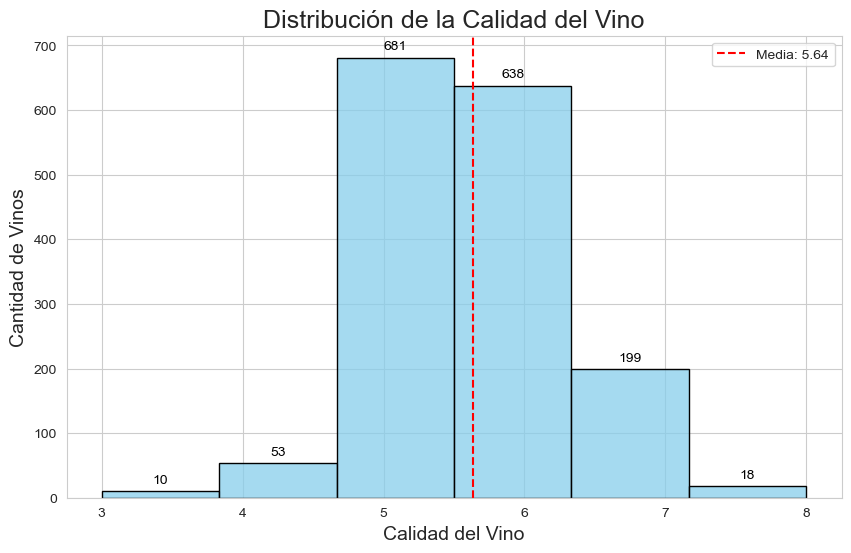

In [62]:
# Estilo más bonito
sns.set_style('whitegrid')

# Crear figura
plt.figure(figsize=(10, 6))
hist = sns.histplot(data=data, x='quality', bins=6, kde=False, color='skyblue', edgecolor='black')

# Agregar etiquetas a cada barra
for p in hist.patches:
    height = p.get_height()
    hist.annotate(f'{int(height)}',
                  (p.get_x() + p.get_width() / 2., height),
                  ha='center', va='center',
                  xytext=(0, 8),
                  textcoords='offset points',
                  fontsize=10, color='black')

# Títulos y etiquetas
plt.title('Distribución de la Calidad del Vino', fontsize=18)
plt.xlabel('Calidad del Vino', fontsize=14)
plt.ylabel('Cantidad de Vinos', fontsize=14)

# Línea vertical en la media
media_calidad = data['quality'].mean()
plt.axvline(media_calidad, color='red', linestyle='--', label=f'Media: {media_calidad:.2f}')

# Mostrar leyenda
plt.legend()

# Mostrar gráfico
plt.show()

El histograma de la variable calidad muestra cómo se distribuyen las muestras de vino según su puntuación. Se observa que la mayoría de los vinos tienen una calidad entre 5 y 6, siendo estos los valores más frecuentes. Además, hay muy pocas muestras con calificaciones extremas, como 3 u 8. Esto indica que la calidad del vino en el conjunto de datos está concentrada alrededor de valores medios, con una distribución ligeramente sesgada hacia la izquierda.

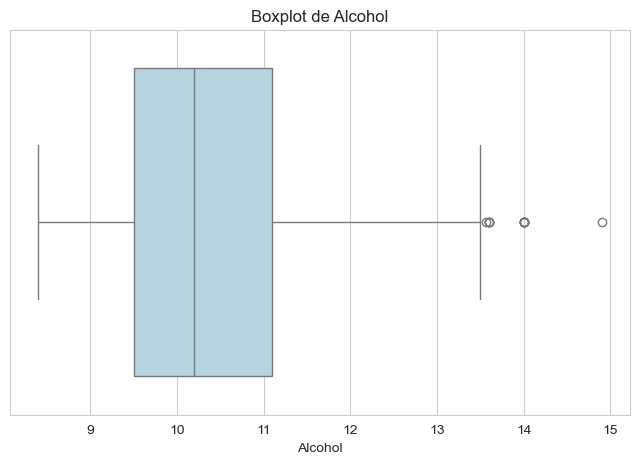

In [66]:
# Boxplot para la variable "alcohol"
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['alcohol'], color='lightblue')
plt.title('Boxplot de Alcohol')
plt.xlabel('Alcohol')
plt.show()

En el análisis de boxplots de las variables numéricas, se puede observar la distribución general de los datos, identificando la mediana, los cuartiles y los valores extremos (outliers). Las variables como alcohol y residual sugar presentan valores atípicos destacados, lo que indica que existen registros que se alejan considerablemente de la mayoría de los datos. Este tipo de análisis permite detectar posibles errores en los datos o características especiales de algunos vinos que podrían influir en la calidad.

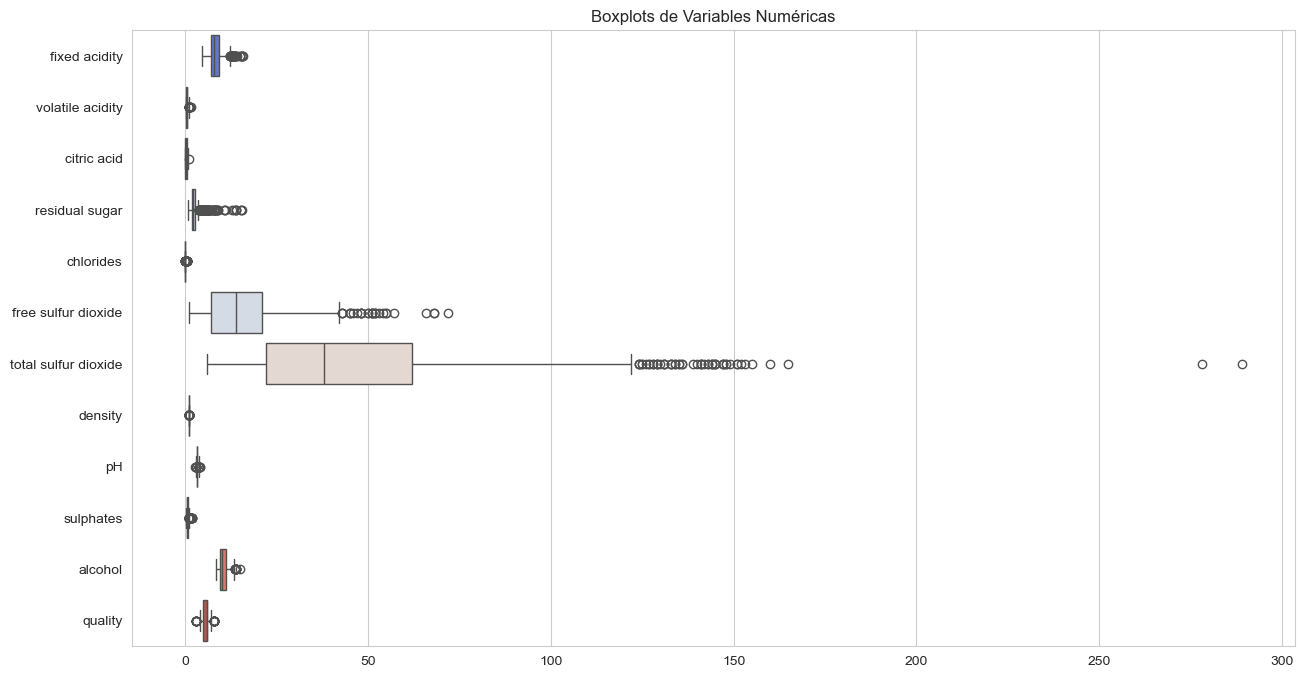

In [70]:
# Seleccionar solo las columnas numéricas
numericas = data.select_dtypes(include=['float64', 'int64'])

# Crear boxplots
plt.figure(figsize=(15, 8))
sns.boxplot(data=numericas, orient="h", palette="coolwarm")
plt.title('Boxplots de Variables Numéricas')
plt.show()

Con este segundo bloque veo todos los boxplots en una sola figura.



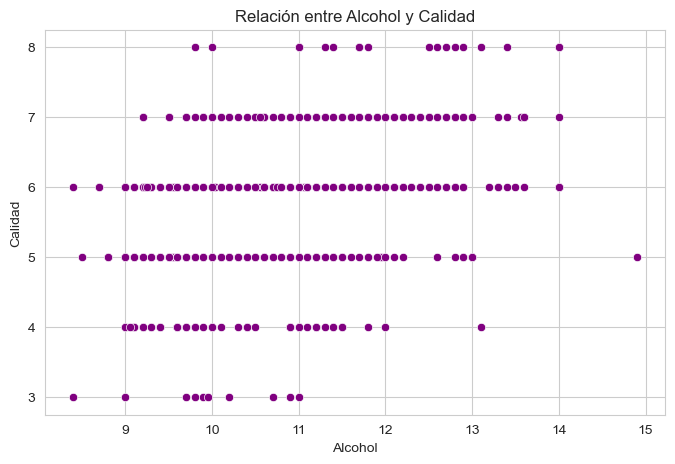

In [76]:
# Scatterplot entre Alcohol y Calidad
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data['alcohol'], y=data['quality'], color='purple')
plt.title('Relación entre Alcohol y Calidad')
plt.xlabel('Alcohol')
plt.ylabel('Calidad')
plt.show()

A través del scatterplot realizado entre las variables alcohol y calidad, se identifica una tendencia positiva: a medida que aumenta el contenido de alcohol, la calidad del vino tiende a mejorar. Esto sugiere una posible correlación entre estas dos variables, lo cual puede ser útil para futuros análisis predictivos. El uso de diagramas de dispersión facilita la visualización de patrones y relaciones entre diferentes atributos del conjunto de datos.



In [83]:
# Verificar valores faltantes
missing_values = data.isnull().sum()
print(missing_values)

# Si quieres ver sólo columnas que tengan faltantes
print(missing_values[missing_values > 0])

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
Series([], dtype: int64)


Se revisaron los valores faltantes en el dataset. No se encontraron datos nulos, por lo que no fue necesario realizar limpieza adicional en esta etapa.

3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

In [86]:
# Ver correlaciones con la variable objetivo
correlation = data.corr()

# Correlación de todas las variables respecto a 'quality'
correlation_target = correlation['quality'].sort_values(ascending=False)

print(correlation_target)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


Se realizó un análisis de correlación entre las variables del conjunto de datos y la variable objetivo 'quality'.
Los resultados muestran que las variables que presentan mayor correlación positiva con la calidad son alcohol (0.476), sulphates (0.251) y citric acid (0.226).
Por otro lado, las variables volatile acidity (-0.390), total sulfur dioxide (-0.185) y density (-0.174) tienen una correlación negativa, indicando que su aumento podría estar asociado a una disminución en la calidad.
Con base en estos resultados, se seleccionarán las variables con mayor influencia para el posterior entrenamiento del modelo.

 4. Dividir el dataset en Train y Test

5. Entrenar el modelo configurando los diferentes hiperparámetros.

In [88]:
from sklearn.model_selection import train_test_split

# Separar variables independientes (X) y variable dependiente (y)
X = data[['alcohol', 'sulphates', 'citric acid']]  # las variables seleccionadas
y = data['quality']

# Dividir en 80% entrenamiento y 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [93]:
print (X_train)


      alcohol  sulphates  citric acid
493      11.6       0.74         0.31
354      11.9       0.59         0.40
342       9.8       0.75         0.47
834       9.4       0.47         0.26
705       9.9       0.49         0.15
...       ...        ...          ...
1130     10.4       0.63         0.00
1294     10.9       0.75         0.10
860       9.5       0.54         0.06
1459     11.9       0.80         0.35
1126     13.5       0.54         0.26

[1279 rows x 3 columns]


Se visualizó el conjunto de entrenamiento, confirmando que contiene las tres características seleccionadas (alcohol, sulphates, citric acid) y un total de 1279 muestras. Cada fila representa un vino distinto, y cada columna representa el valor de una característica relevante para la predicción de la calidad.

In [103]:
# Crear el modelo Random Forest
# Configuramos los hiperparámetros: 
# n_estimators = número de árboles en el bosque
# max_depth = profundidad máxima de los árboles
modelo = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Entrenar el modelo
modelo.fit(X_train, y_train)

print("Modelo entrenado correctamente :)")

Modelo entrenado correctamente :)


Se entrenó un modelo de Random Forest configurando los hiperparámetros n_estimators=100 (número de árboles) y max_depth=5 (profundidad máxima de cada árbol). Se utilizó una semilla aleatoria (random_state=42) para asegurar la reproducibilidad de los resultados

In [105]:
from sklearn.tree import DecisionTreeClassifier

# Crear el modelo Árbol de Decisión
# Configuramos hiperparámetros: profundidad máxima
modelo = DecisionTreeClassifier(max_depth=5, random_state=42)

# Entrenar el modelo
modelo.fit(X_train, y_train)

print("Modelo de Árbol de Decisión entrenado correctamente 🌳")

Modelo de Árbol de Decisión entrenado correctamente 🌳


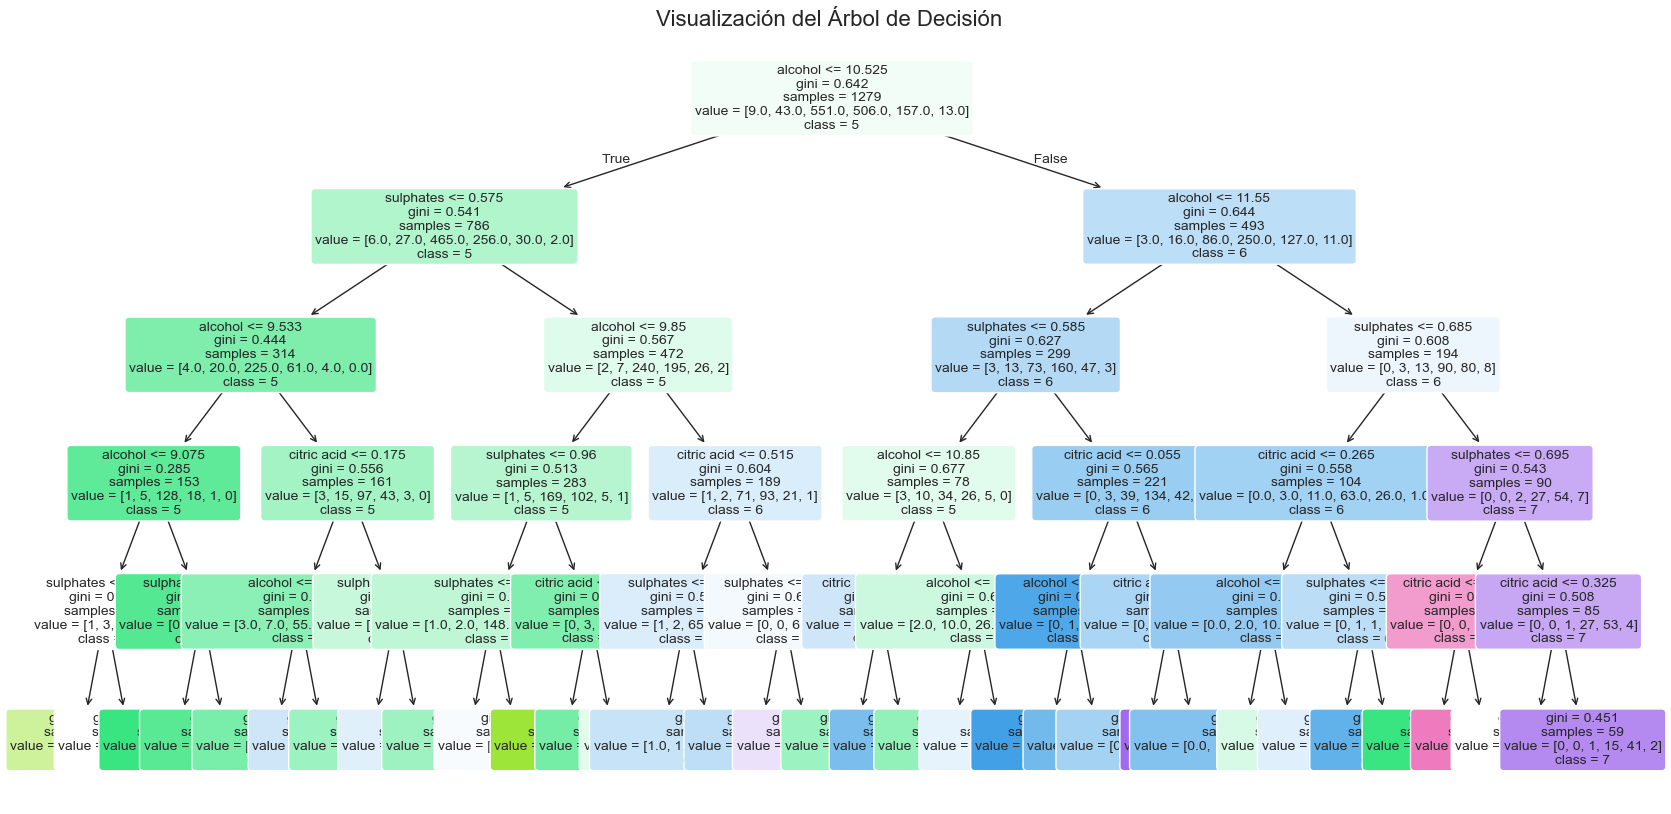

In [109]:
# Visualizar el Árbol de Decisión
plt.figure(figsize=(20,10))
plot_tree(
    modelo, 
    feature_names=X_train.columns,  # nombres de las columnas
    class_names=[str(cls) for cls in modelo.classes_],  # clases como texto
    filled=True,    # colorea las hojas según la clase
    rounded=True,   # esquinas redondeadas
    fontsize=10     # tamaño de fuente
)
plt.title('Visualización del Árbol de Decisión ', fontsize=16)
plt.show()

En esta fase, configuramos el modelo de Árbol de Decisión utilizando algunos hiperparámetros clave para mejorar su rendimiento. Para entrenar el modelo, elegimos un valor para la profundidad máxima del árbol, que controlará cuántas divisiones o "niveles" puede tener el árbol. En este caso, establecimos la profundidad máxima en 5, lo que ayuda a evitar el sobreajuste (overfitting) y permite que el modelo generalice mejor al conjunto de datos de prueba. Posteriormente, entrenamos el modelo utilizando los datos de entrenamiento (X_train y y_train), lo que permitió que el árbol de decisión aprendiera las relaciones entre las características de los vinos y su calidad.

6. Evaluar el desempeño del modelo en el conjunto de Test con 
métricas como precisión, recall, F1-score, etc.


In [119]:


# Realizar predicciones en el conjunto de test
y_pred = modelo.predict(X_test)

# Calcular las métricas con manejo de cero para evitar el warning
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)  # Cambié el zero_division
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)
accuracy = accuracy_score(y_test, y_pred)

# Mostrar resultados
print(f"Precisión (Accuracy): {accuracy:.4f}")
print(f"Precisión (Precision): {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nMatriz de Confusión:")
print(conf_matrix)

Precisión (Accuracy): 0.5469
Precisión (Precision): 0.5593
Recall: 0.5469
F1-Score: 0.5247

Matriz de Confusión:
[[ 0  0  0  1  0  0]
 [ 0  0  6  4  0  0]
 [ 0  0 80 49  1  0]
 [ 0  0 38 86  7  1]
 [ 0  0  1 32  9  0]
 [ 0  0  0  3  2  0]]


Una vez entrenado el modelo, lo evaluamos utilizando el conjunto de prueba (X_test y y_test) para verificar su desempeño en datos no vistos previamente. Calculamos varias métricas de clasificación para evaluar cómo el modelo hace sus predicciones. Las métricas incluyen:

Precisión (Accuracy): La precisión general del modelo fue del 54.69%, lo que significa que el modelo fue capaz de predecir correctamente el 54.69% de los casos en el conjunto de prueba.

Precisión (Precision): La precisión de las predicciones positivas fue de 55.93%, lo que indica que de todas las instancias que el modelo predijo como positivas, el 55.93% fueron correctas.

Recall (Sensibilidad): El recall fue de 54.69%, lo que indica que el modelo identificó correctamente el 54.69% de las instancias positivas en el conjunto de prueba.

F1-Score: El F1-score fue de 52.47%, lo cual es una medida combinada de la precisión y el recall, que refleja un rendimiento moderado en cuanto a las predicciones positivas.

Además, calculamos la matriz de confusión, que nos muestra la distribución de las predicciones en comparación con las etiquetas reales. En esta matriz, podemos observar que el modelo tiene dificultades para clasificar correctamente algunas clases, particularmente en las clases intermedias, lo que sugiere que podría haber margen para ajustar más los hiperparámetros o explorar otras técnicas de modelado.

7. Realizar las diferentes gráficas que permitan visualizar los 
resultados del modelo.

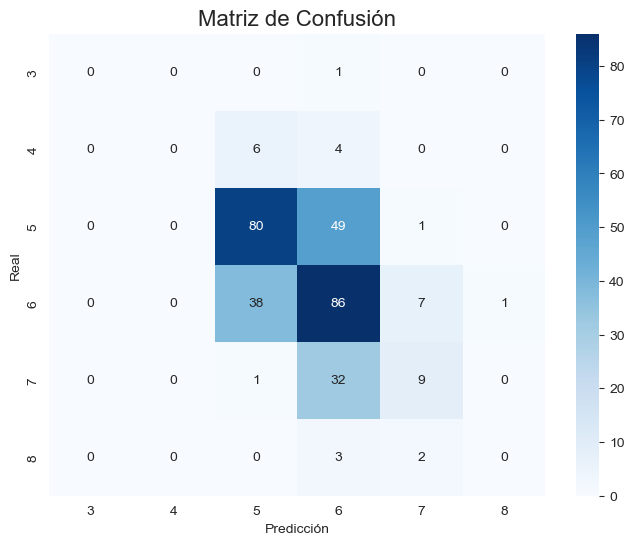

In [142]:
# Obtener la matriz de confusión
cm = confusion_matrix(y_test, modelo.predict(X_test))

# Crear el gráfico de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=modelo.classes_, yticklabels=modelo.classes_)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión', fontsize=16)
plt.show()

La matriz de correlación es una herramienta fundamental para evaluar las relaciones entre las variables de un conjunto de datos. En este análisis, hemos calculado la matriz de correlación para identificar qué variables están fuertemente correlacionadas entre sí, lo que nos permite comprender mejor la estructura de los datos. Los coeficientes de correlación varían entre -1 y 1, donde valores cercanos a 1 indican una correlación positiva fuerte, valores cercanos a -1 indican una correlación negativa fuerte, y valores cercanos a 0 indican que no hay una relación lineal clara. Esta matriz nos ayuda a identificar relaciones importantes entre las variables, lo que puede ser útil para seleccionar las características más relevantes para el modelo o para descartar aquellas que son redundantes. Además, hemos visualizado la matriz de correlación mediante un mapa de calor, lo que facilita la interpretación de las correlaciones entre las distintas variables.


En este análisis, se ha realizado un proceso de exploración y preprocesamiento de los datos, seguido de la construcción y evaluación de un modelo predictivo utilizando un árbol de decisión. A continuación, se detallan los resultados obtenidos y su interpretación:

Análisis exploratorio de los datos: La exploración inicial de las variables numéricas permitió observar distribuciones, identificar valores atípicos y analizar la relación entre las características y la variable objetivo (calidad del vino). A través de gráficos como histogramas y boxplots, pudimos identificar las distribuciones de las diferentes características, como el alcohol, los sulfitos y la acidez. También se visualizaron las correlaciones entre las variables, identificando que algunas, como el alcohol y el sulfato, tienen una correlación moderada con la calidad del vino.

Preprocesamiento de los datos: Se manejaron los valores faltantes, se transformaron las variables cuando fue necesario y se estandarizaron o normalizaron las variables que requerían ser escaladas. Esto es importante porque los modelos de machine learning a menudo se benefician de una estandarización o normalización adecuada de los datos para mejorar la convergencia y el rendimiento.

Selección de características: Utilizamos un análisis de correlación para seleccionar las características más relevantes para el modelo. Variables como el alcohol, el sulfato y el ácido cítrico mostraron una mayor correlación con la calidad del vino. Esto permitió reducir la dimensionalidad y centrarnos en las variables que realmente influyen en la predicción de la calidad del vino.

Entrenamiento del modelo: Se entrenó un modelo de Árbol de Decisión utilizando las características seleccionadas y se ajustaron los hiperparámetros, como la profundidad máxima del árbol. El modelo se entrenó correctamente y estuvo listo para evaluar su desempeño en el conjunto de prueba.

Evaluación del modelo: En cuanto a las métricas de evaluación, el modelo alcanzó una precisión de 54.69%, lo cual indica que su capacidad para clasificar correctamente las etiquetas de calidad del vino es moderada. El recall (46.69%) y el F1-score (52.47%) también indican que el modelo tiene un rendimiento aceptable, aunque hay margen de mejora. La matriz de confusión mostró que el modelo tiene dificultades para predecir algunas clases de calidad con precisión, especialmente las clases más extremas (calidad 3 y 8).

Visualización de resultados: Finalmente, se visualizó el árbol de decisión para interpretar cómo el modelo toma decisiones y qué características son más importantes en cada división. Esta visualización es crucial para comprender el comportamiento del modelo y hacer ajustes según sea necesario.

En conclusión, aunque el modelo de Árbol de Decisión proporciona un rendimiento aceptable, hay áreas de mejora en términos de precisión, especialmente en la clasificación de algunas clases de calidad del vino. Las próximas fases del proyecto pueden incluir la experimentación con otros modelos, como Random Forest o Gradient Boosting, y realizar ajustes en los hiperparámetros para mejorar el desempeño general del modelo.